<a href="https://colab.research.google.com/github/paulorc-silva/Conteudos-Sobre-Dados--Impacta/blob/master/Aulas_IA_Redes_Neurais_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link do dataset](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification)

# Rede Neural MLP para Classificação

## Importando as bibliotecas

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

## Utilizando a base de dados

In [ ]:
dados = pd.read_csv('/content/predictive_maintenance.csv')

In [ ]:
dados.head()

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Análise Exploratória dos dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UDI                        10000 non-null  int64  
 1   ID Produto                 10000 non-null  object 
 2   Tipo                       10000 non-null  object 
 3   Temperatura Ar [K]         10000 non-null  float64
 4   Temperatura Processo [K]   10000 non-null  float64
 5   Velocidade Rotacao [rpm]   10000 non-null  int64  
 6   Torque [Nm]                10000 non-null  float64
 7   Desgaste Ferramenta [min]  10000 non-null  int64  
 8   Alvo                       10000 non-null  int64  
 9   Tipo da Falha              10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
dados['Tipo'].value_counts()

L    6000
M    2997
H    1003
Name: Tipo, dtype: int64

In [ ]:
x = dados['UDI']

y1 = dados['ID Produto']
y2 = dados['Tipo']
y3 = dados['Temperatura Ar [K]']
y4 = dados['Temperatura Processo [K]']
y5 = dados['Velocidade Rotacao [rpm]']
y6 = dados['Torque [Nm]']
y7 = dados['Desgaste Ferramenta [min]']
y8 = dados['Alvo']
y9 = dados['Tipo da Falha']

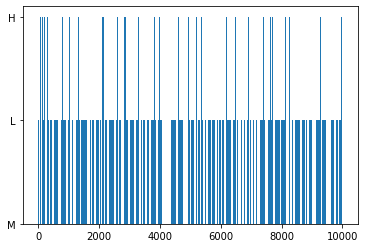

In [ ]:
plt.bar(x, y2)
plt.show()

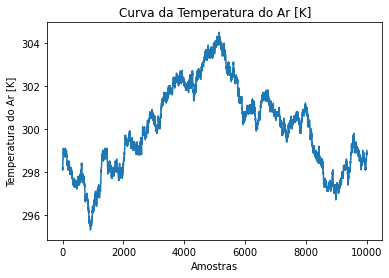

In [ ]:
plt.plot(x, y3)
plt.xlabel('Amostras')
plt.ylabel('Temperatura do Ar [K]')
plt.title('Curva da Temperatura do Ar [K]')
plt.show()

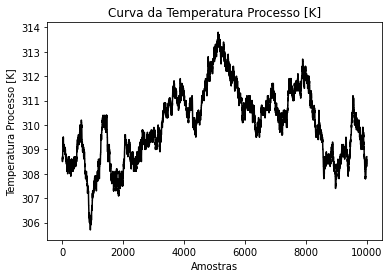

In [ ]:
plt.plot(x, y4, color="black")
plt.xlabel('Amostras')
plt.ylabel('Temperatura Processo [K]')
plt.title('Curva da Temperatura Processo [K]')
plt.show()

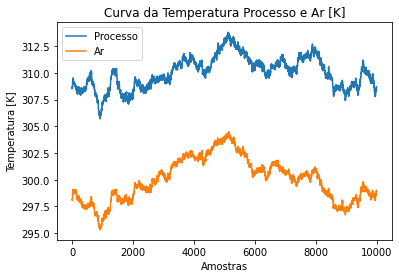

In [ ]:
plt.plot(x, y4, x, y3)
plt.xlabel('Amostras')
plt.ylabel('Temperatura [K]')
plt.title('Curva da Temperatura Processo e Ar [K]')
plt.legend(('Processo', 'Ar'))
plt.show()

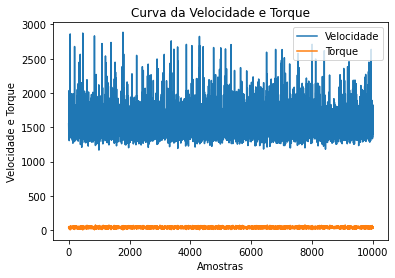

In [ ]:
plt.plot(x, y5, x, y6)
plt.xlabel('Amostras')
plt.ylabel('Velocidade e Torque')
plt.title('Curva da Velocidade e Torque')
plt.legend(('Velocidade', 'Torque'))
plt.show()

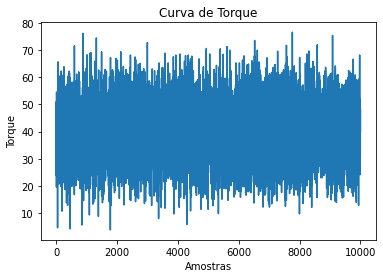

In [ ]:
plt.plot(x, y6)
plt.xlabel('Amostras')
plt.ylabel('Torque')
plt.title('Curva de Torque')
plt.show()

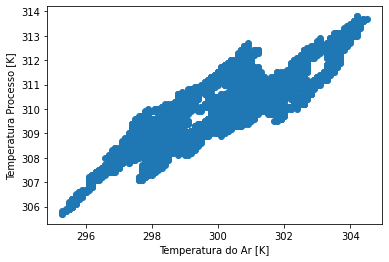

In [ ]:
plt.scatter(y3, y4)
plt.xlabel('Temperatura do Ar [K]')
plt.ylabel('Temperatura Processo [K]')
plt.show()

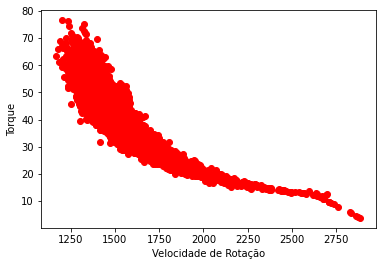

In [ ]:
plt.scatter(y5, y6, color="red")
plt.xlabel('Velocidade de Rotação')
plt.ylabel('Torque')
plt.show()

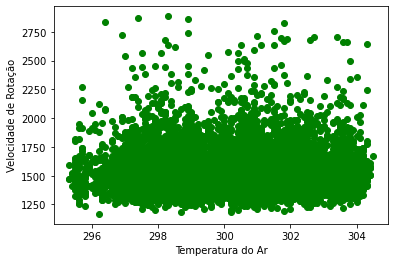

In [ ]:
plt.scatter(y3, y5, color="green")
plt.xlabel('Temperatura do Ar')
plt.ylabel('Velocidade de Rotação')
plt.show()

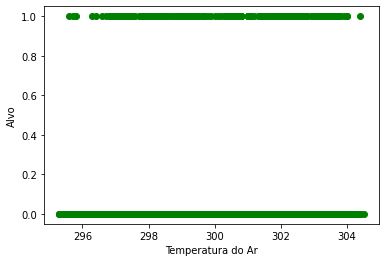

In [ ]:
plt.scatter(y3, y8, color="green")
plt.xlabel('Temperatura do Ar')
plt.ylabel('Alvo')
plt.show()

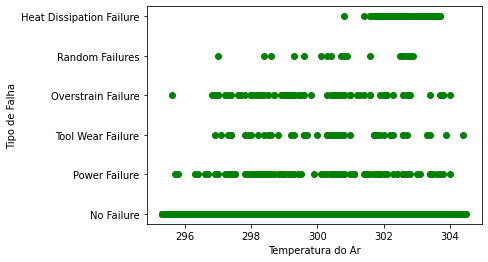

In [ ]:
plt.scatter(y3, y9, color="green")
plt.xlabel('Temperatura do Ar')
plt.ylabel('Tipo de Falha')
plt.show()

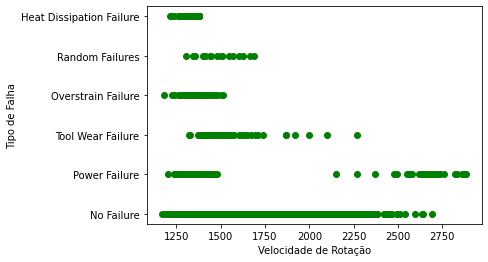

In [ ]:
plt.scatter(y5, y9, color="green")
plt.xlabel('Velocidade de Rotação')
plt.ylabel('Tipo de Falha')
plt.show()

In [ ]:
dados['Tipo'].value_counts()

L    6000
M    2997
H    1003
Name: Tipo, dtype: int64

In [ ]:
enc = LabelEncoder()
enc.fit(dados['Tipo'])
dados['Tipo'] = enc.transform(dados['Tipo'])

In [ ]:
dados.head()

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
dados['Tipo'].value_counts()

1    6000
2    2997
0    1003
Name: Tipo, dtype: int64

## Primeira modelagem usando rede neural MLP

In [ ]:
y = dados['Alvo']

x = dados[['Tipo',
        'Temperatura Ar [K]',
        'Temperatura Processo [K]',
        'Velocidade Rotacao [rpm]',
        'Torque [Nm]',
        'Desgaste Ferramenta [min]']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 10, 10, 10), max_iter=100, activation='relu', solver='adam', random_state=1, verbose=True)

In [ ]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 3.46047519
Iteration 2, loss = 0.22840870
Iteration 3, loss = 0.16367490
Iteration 4, loss = 0.13870512
Iteration 5, loss = 0.13328073
Iteration 6, loss = 0.12139587
Iteration 7, loss = 0.12113890
Iteration 8, loss = 0.11941523
Iteration 9, loss = 0.11801014
Iteration 10, loss = 0.11549419
Iteration 11, loss = 0.12502065
Iteration 12, loss = 0.14267191
Iteration 13, loss = 0.10890691
Iteration 14, loss = 0.12169916
Iteration 15, loss = 0.11110154
Iteration 16, loss = 0.10388082
Iteration 17, loss = 0.10660867
Iteration 18, loss = 0.10632362
Iteration 19, loss = 0.11772552
Iteration 20, loss = 0.10830132
Iteration 21, loss = 0.10283905
Iteration 22, loss = 0.11321114
Iteration 23, loss = 0.11233972
Iteration 24, loss = 0.10643800
Iteration 25, loss = 0.10229989
Iteration 26, loss = 0.10167418
Iteration 27, loss = 0.12123767
Iteration 28, loss = 0.14121612
Iteration 29, loss = 0.10589002
Iteration 30, loss = 0.11824101
Iteration 31, loss = 0.10207420
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 50, 10, 10, 10), max_iter=100,
              random_state=1, verbose=True)

In [ ]:
y_pred_test = mlp.predict(x_test)
y_pred_train = mlp.predict(x_train)

In [ ]:
y_test.value_counts()

0    2896
1     104
Name: Alvo, dtype: int64

In [ ]:
metrics.accuracy_score(y_test, y_pred_test)

0.9606666666666667

In [ ]:
pd.Series(y_pred_test).value_counts()

0    2900
1     100
dtype: int64

In [ ]:
pd.Series(y_pred_train).value_counts()

0    6781
1     219
dtype: int64

In [ ]:
train_score = metrics.accuracy_score(y_pred_train, y_train)
print("Score nos dados de treinamento: ", train_score)
test_score = metrics.accuracy_score(y_pred_test, y_test)
print("Score nos dados de teste: ", test_score)

Score nos dados de treinamento:  0.9648571428571429
Score nos dados de teste:  0.9606666666666667


In [ ]:
x_mlp = list(range(3000))

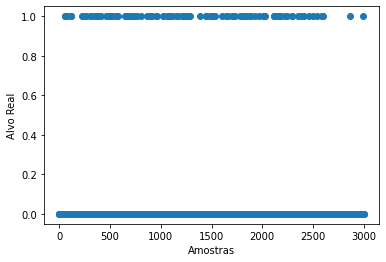

In [ ]:
plt.scatter(x_mlp, y_test)
plt.xlabel('Amostras')
plt.ylabel('Alvo Real')
plt.show()

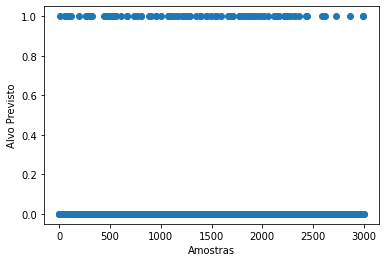

In [ ]:
plt.scatter(x_mlp, y_pred_test)
plt.xlabel('Amostras')
plt.ylabel('Alvo Previsto')
plt.show()

## Dividindo o data set para treino, validação e teste

In [ ]:
df_principal = dados.sample(frac=0.85, random_state=786)
df_test = dados.drop(df_principal.index)

## Avaliação do modelo no DataFrame Principal

In [ ]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 9730 to 509
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UDI                        8500 non-null   int64  
 1   ID Produto                 8500 non-null   object 
 2   Tipo                       8500 non-null   int64  
 3   Temperatura Ar [K]         8500 non-null   float64
 4   Temperatura Processo [K]   8500 non-null   float64
 5   Velocidade Rotacao [rpm]   8500 non-null   int64  
 6   Torque [Nm]                8500 non-null   float64
 7   Desgaste Ferramenta [min]  8500 non-null   int64  
 8   Alvo                       8500 non-null   int64  
 9   Tipo da Falha              8500 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 730.5+ KB


In [ ]:
y_principal = df_principal['Alvo']

x_principal = df_principal[['Temperatura Ar [K]',
    'Temperatura Processo [K]',
    'Velocidade Rotacao [rpm]',
    'Torque [Nm]',
    'Desgaste Ferramenta [min]']]

In [ ]:
# 15% de validação
x_train, x_validation, y_train, y_validation = train_test_split(x_principal, y_principal, test_size = 0.15)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter = 100, activation = 'relu', solver = 'adam', verbose=True)

In [ ]:
mlp.fit(x_train, y_train)
y_predict_train = mlp.predict(x_train)

Iteration 1, loss = 0.87072440
Iteration 2, loss = 0.29331726
Iteration 3, loss = 0.21159967
Iteration 4, loss = 0.15056429
Iteration 5, loss = 0.16919580
Iteration 6, loss = 0.13625453
Iteration 7, loss = 0.12521741
Iteration 8, loss = 0.51087587
Iteration 9, loss = 0.11715599
Iteration 10, loss = 0.11418672
Iteration 11, loss = 0.13994925
Iteration 12, loss = 0.11429467
Iteration 13, loss = 0.15154673
Iteration 14, loss = 0.15011421
Iteration 15, loss = 0.11310764
Iteration 16, loss = 0.10915691
Iteration 17, loss = 0.11822283
Iteration 18, loss = 0.10480071
Iteration 19, loss = 0.11298301
Iteration 20, loss = 0.19625938
Iteration 21, loss = 0.16261487
Iteration 22, loss = 0.23247055
Iteration 23, loss = 0.26939769
Iteration 24, loss = 0.27893834
Iteration 25, loss = 0.45800350
Iteration 26, loss = 0.14374024
Iteration 27, loss = 0.11064066
Iteration 28, loss = 0.11048977
Iteration 29, loss = 0.10943634
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

In [ ]:
mlp.fit(x_validation, y_validation)
y_predict_validation = mlp.predict(x_validation)

Iteration 1, loss = 1.24386231
Iteration 2, loss = 1.24219135
Iteration 3, loss = 1.04397256
Iteration 4, loss = 0.86627652
Iteration 5, loss = 0.61046549
Iteration 6, loss = 0.57805778
Iteration 7, loss = 0.48935094
Iteration 8, loss = 0.43385328
Iteration 9, loss = 0.34681245
Iteration 10, loss = 0.34155689
Iteration 11, loss = 0.31605792
Iteration 12, loss = 0.29830665
Iteration 13, loss = 0.37479690
Iteration 14, loss = 0.27645317
Iteration 15, loss = 0.27902835
Iteration 16, loss = 0.28107804
Iteration 17, loss = 0.31924568
Iteration 18, loss = 0.26631921
Iteration 19, loss = 0.30903485
Iteration 20, loss = 0.28709212
Iteration 21, loss = 0.25826590
Iteration 22, loss = 0.25656070
Iteration 23, loss = 0.23605760
Iteration 24, loss = 0.22565763
Iteration 25, loss = 0.22842907
Iteration 26, loss = 0.21917998
Iteration 27, loss = 0.21808685
Iteration 28, loss = 0.24783350
Iteration 29, loss = 0.28493559
Iteration 30, loss = 0.23044859
Iteration 31, loss = 0.21301897
Iteration 32, los

In [ ]:
print("Train accuracy: ", metrics.accuracy_score(y_train, y_predict_train))
print("Train precision: ", metrics.average_precision_score(y_train, y_predict_train))
print("Train recall: ", metrics.recall_score(y_train, y_predict_train))
print("Train F1 score: ", metrics.f1_score(y_train, y_predict_train))
print("Train curva ROC: ", metrics.roc_auc_score(y_train, y_predict_train))

Train accuracy:  0.9680276816608997
Train precision:  0.12695563600934442
Train recall:  0.12648221343873517
Train F1 score:  0.21694915254237288
Train curva ROC:  0.5625239523877553


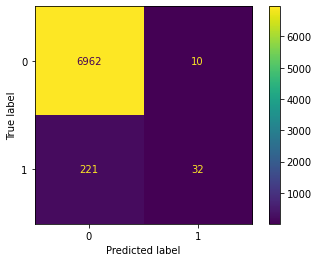

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_predict_train)

## Avaliação do modelo no DataFrame Teste

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UDI                        1500 non-null   int64  
 1   ID Produto                 1500 non-null   object 
 2   Tipo                       1500 non-null   int64  
 3   Temperatura Ar [K]         1500 non-null   float64
 4   Temperatura Processo [K]   1500 non-null   float64
 5   Velocidade Rotacao [rpm]   1500 non-null   int64  
 6   Torque [Nm]                1500 non-null   float64
 7   Desgaste Ferramenta [min]  1500 non-null   int64  
 8   Alvo                       1500 non-null   int64  
 9   Tipo da Falha              1500 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 128.9+ KB


In [ ]:
y_test = df_test['Alvo']

x_test = df_test[['Temperatura Ar [K]',
    'Temperatura Processo [K]',
    'Velocidade Rotacao [rpm]',
    'Torque [Nm]',
    'Desgaste Ferramenta [min]']]

In [ ]:
y_predict_test = mlp.predict(x_test)

In [ ]:
print("Test accuracy: ", metrics.accuracy_score(y_test, y_predict_test))
print("Test precision: ", metrics.average_precision_score(y_test, y_predict_test))
print("Test recall: ", metrics.recall_score(y_test, y_predict_test))
print("Test F1 score: ", metrics.f1_score(y_test, y_predict_test))
print("Test curva ROC: ", metrics.roc_auc_score(y_test, y_predict_test))

Test accuracy:  0.9726666666666667
Test precision:  0.05114285714285714
Test recall:  0.023809523809523808
Test F1 score:  0.046511627906976744
Test curva ROC:  0.5119047619047619


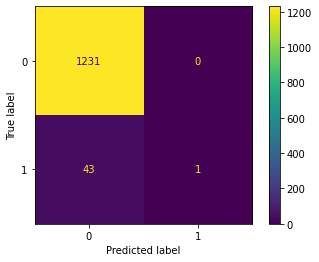

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_validation, y_predict_validation)

## Interpretabilidade do modelo

In [ ]:
explainer = shap.KernelExplainer(mlp.predict, x_train)
shap_values = explainer.shap_values(x_validation)

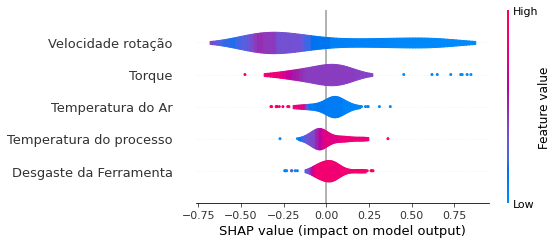

In [ ]:
shap.summary_plot(shap_values, x_validation, plot_type='violin')

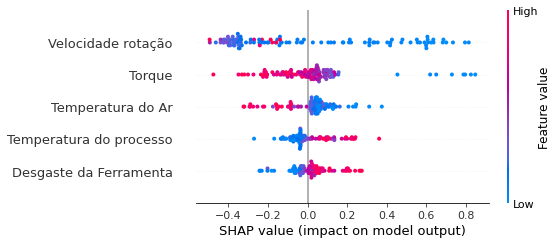

In [ ]:
shap.summary_plot(shap_values, x_validation)

# Rede Neural MLP para Regressão

## Importando as bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

## Utilizando a base de dados

In [ ]:
dados = pd.read_csv('/content/predictive_maintenance.csv')

FileNotFoundError: ignored

In [ ]:
dados.head()

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Análise Exploratória dos dados

In [ ]:
x = dados['UDI']
y = dados['Temperatura Processo [K]']

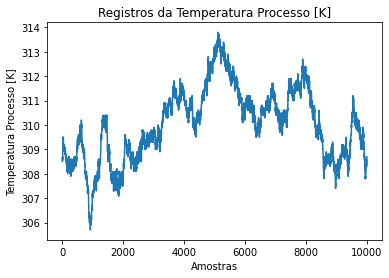

In [ ]:
plt.plot(x, y)
plt.xlabel('Amostras')
plt.ylabel('Temperatura Processo [K]')
plt.title('Registros da Temperatura Processo [K]')
plt.show()

## Modelagem usando rede neural MLP

In [ ]:
# Parametrizando dos dados de entrada e saida
y = dados['Temperatura Processo [K]']

x = dados[['Temperatura Ar [K]',
        'Velocidade Rotacao [rpm]',
        'Torque [Nm]',
        'Desgaste Ferramenta [min]']]

In [ ]:
# Separando os dados para treino e para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
# Parametrizando a rede neural
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100, activation='relu', solver='adam', random_state=1, verbose=True)

In [ ]:
# Treinando a rede neural
mlp.fit(x_train, y_train)

Iteration 1, loss = 16850.55771845
Iteration 2, loss = 843.36763162
Iteration 3, loss = 459.74076487
Iteration 4, loss = 318.34487879
Iteration 5, loss = 187.70477506
Iteration 6, loss = 89.55489325
Iteration 7, loss = 30.37839558
Iteration 8, loss = 11.82215312
Iteration 9, loss = 9.09296739
Iteration 10, loss = 8.24797841
Iteration 11, loss = 8.05473256
Iteration 12, loss = 7.29259554
Iteration 13, loss = 6.70289230
Iteration 14, loss = 6.35195274
Iteration 15, loss = 5.96524666
Iteration 16, loss = 5.80610495
Iteration 17, loss = 5.45156448
Iteration 18, loss = 5.15153616
Iteration 19, loss = 4.60904758
Iteration 20, loss = 4.28045136
Iteration 21, loss = 4.17575822
Iteration 22, loss = 3.67204720
Iteration 23, loss = 3.28863575
Iteration 24, loss = 3.08734894
Iteration 25, loss = 2.93775327
Iteration 26, loss = 2.72549107
Iteration 27, loss = 2.17792813
Iteration 28, loss = 1.90115381
Iteration 29, loss = 1.88809764
Iteration 30, loss = 1.59609948
Iteration 31, loss = 1.45376175
It

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100, random_state=1,
             verbose=True)

In [ ]:
y_pred_test = mlp.predict(x_test)
y_pred_train = mlp.predict(x_train)

In [ ]:
y_pred_test = pd.Series(y_pred_test)
y_pred_train = pd.Series(y_pred_train)

In [ ]:
# Preparação dos dados para plotagem
xt = list(range(3000))

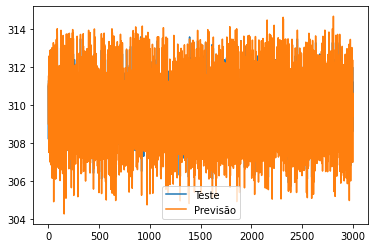

In [ ]:
# Plotando os gráficos
plt.plot(xt, y_test, xt, y_pred_test)
plt.legend(('Teste', 'Previsão'))
plt.show()

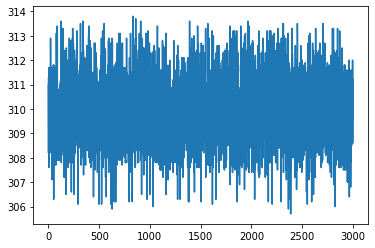

In [ ]:
# Plotando os gráficos
plt.plot(xt, y_test)
plt.show()

In [ ]:
print('Test MAE score: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('Test MSE score: ', metrics.mean_squared_error(y_test, y_pred_test))
print('Test RMSE score com parâmetros: ', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('Test RMSE score com numpy: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('Test R2 score: ', metrics.r2_score(y_test, y_pred_test))

Test MAE score:  0.9184852401137523
Test MSE score:  1.2287703103695773
Test RMSE score com parâmetros:  1.1084991251099738
Test RMSE score com numpy:  1.1084991251099738
Test R2 score:  0.4510938050419687
